In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_email = pd.read_csv('hw3Data/emails.csv', header=0).values[:,1:].astype(np.int32)
data_q1 = pd.read_csv('hw3Data/D2z.txt', header=None, delimiter=' ').values.astype(np.float32)
data_email.shape

(5000, 3001)

In [5]:
data_q1

array([[-0.333338  , -0.0871707 ,  0.        ],
       [-1.53173   ,  0.358194  ,  1.        ],
       [ 1.54959   , -0.36405   ,  0.        ],
       [-1.34991   ,  0.252063  ,  1.        ],
       [ 1.28385   , -0.531146  ,  0.        ],
       [-1.36414   ,  0.623197  ,  1.        ],
       [ 0.596974  ,  0.0471854 ,  1.        ],
       [-1.62028   , -0.214322  ,  1.        ],
       [-1.2752    ,  0.409967  ,  1.        ],
       [-0.244046  ,  1.04007   ,  1.        ],
       [-0.21654   , -0.59097   ,  0.        ],
       [ 0.496728  ,  0.212458  ,  1.        ],
       [-0.91148   ,  1.01984   ,  1.        ],
       [-0.463668  ,  1.117     ,  1.        ],
       [ 0.575942  , -1.08807   ,  0.        ],
       [-1.54674   ,  0.324991  ,  1.        ],
       [-1.53841   , -0.205687  ,  1.        ],
       [-0.94811   ,  0.853448  ,  1.        ],
       [ 0.843527  , -0.819308  ,  0.        ],
       [-1.27073   ,  0.495975  ,  1.        ],
       [-0.629323  ,  0.103917  ,  0.   

In [7]:
X_train = data_q1[:,0:-1]
y_train = data_q1[:,-1]

x = np.arange(-2, 2.1, 0.1)
y = np.arange(-2, 2.1, 0.1)
xx, yy = np.meshgrid(x, y)
grid = np.c_[xx.ravel(), yy.ravel()]

def predict_1nn(X_train, y_train, X_test):
    predictions = []
    for test_point in X_test:
        distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
        nearest_neighbor_idx = np.argmin(distances)
        predictions.append(y_train[nearest_neighbor_idx])
    return np.array(predictions)

In [8]:
grid_predictions = predict_1nn(X_train, y_train, grid)

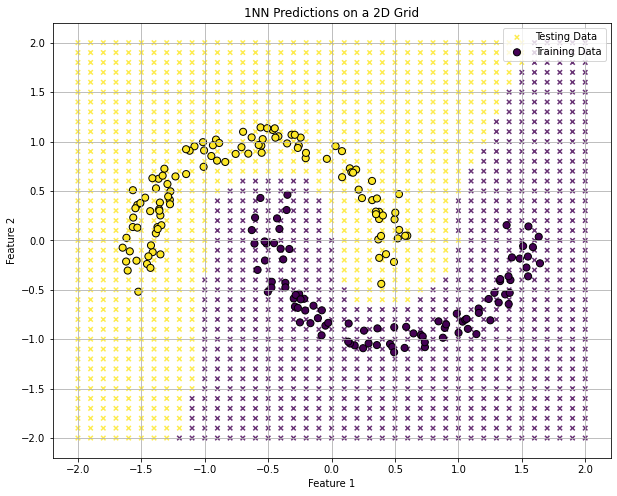

In [18]:
fig1 = plt.figure(figsize=(10, 8))
plt.scatter(grid[:, 0], grid[:, 1], c=grid_predictions, alpha=0.8, cmap='viridis', marker='x', s=20, label='Testing Data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap='viridis', s=50, label='Training Data')
plt.title('1NN Predictions on a 2D Grid')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.show()
fig1.savefig('P2.1_1NN.png')